# RNN Sine Wave

### Overview
Predict a simple sine wave using RNN

Adopted with thanks from [here](https://www.datatechnotes.com/2018/12/rnn-example-with-keras-simplernn-in.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# number formats
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

## Generate some data

In [2]:
# Generate 1000 samples
samples = 1000    
training_samples = 800    

t=np.arange(0,samples)

## Generating a sine wave, with some noise 
x=np.sin(0.02*t)+2*np.random.rand(samples)

## print data
df_orig = pd.DataFrame(x)
df_orig


,0
0,1.6565
1,1.1690
2,0.7687
3,0.6216
4,1.0349
...,...
995,1.5161
996,1.1259
997,1.8623
998,0.9390


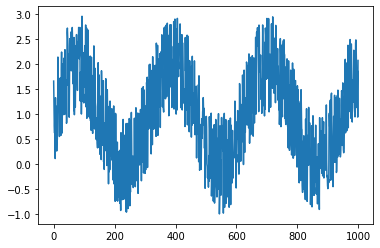

In [3]:
## plot data
plt.plot(df_orig)
plt.show() 

## Train / Test split

In [4]:
## Create train / test values

values=df_orig.values
train,test = values[0:training_samples,:], values[training_samples:samples,:]

print ("values:" , values[1:20])
print ('train size', len(train))
print ('test size', len(test))

values: [[ 1.1690]
 [ 0.7687]
 [ 0.6216]
 [ 1.0349]
 [ 0.1124]
 [ 1.3249]
 [ 0.2906]
 [ 1.1567]
 [ 0.8384]
 [ 0.2623]
 [ 0.5491]
 [ 0.4954]
 [ 0.9406]
 [ 2.1358]
 [ 1.5935]
 [ 1.3424]
 [ 1.3145]
 [ 1.0486]
 [ 0.5519]]
train size 800
test size 200


In [5]:
## padding the data
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

print ("train size", len(train))
print ("test size", len(test))

train size 804
test size 204


In [6]:
## see some data
## compare with original data
train[:30]

array([ 1.6565,  1.1690,  0.7687,  0.6216,  1.0349,  0.1124,  1.3249,
        0.2906,  1.1567,  0.8384,  0.2623,  0.5491,  0.4954,  0.9406,
        2.1358,  1.5935,  1.3424,  1.3145,  1.0486,  0.5519,  0.9634,
        1.7153,  1.4317,  1.7139,  0.5758,  1.8879,  2.2357,  1.3755,
        0.6216,  1.8446])

In [7]:
## vectorize the data

def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

x_train,y_train =convertToMatrix(train,step)
x_test,y_test =convertToMatrix(test,step)

print ("x_train.shape", x_train.shape)
print ("y_train.shape", y_train.shape)
print ("x_test.shape", x_test.shape)
print ("y_test.shape", y_test.shape)

x_train.shape (800, 4)
y_train.shape (800,)
x_test.shape (200, 4)
y_test.shape (200,)


In [8]:
## See data
df = pd.DataFrame(x_train, y_train)
df

,0,1,2,3
1.0349,1.6565,1.1690,0.7687,0.6216
0.1124,1.1690,0.7687,0.6216,1.0349
1.3249,0.7687,0.6216,1.0349,0.1124
0.2906,0.6216,1.0349,0.1124,1.3249
1.1567,1.0349,0.1124,1.3249,0.2906
...,...,...,...,...
-0.0575,0.3849,0.7801,0.6373,0.8977
-0.0575,0.7801,0.6373,0.8977,-0.0575
-0.0575,0.6373,0.8977,-0.0575,-0.0575
-0.0575,0.8977,-0.0575,-0.0575,-0.0575


In [9]:
## Finally, we'll reshape trainX and testX to fit with the Keras model. 
## RNN model requires three-dimensional input data.

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print ("x_train.shape", x_train.shape)
print ("y_train.shape", y_train.shape)
print ("x_test.shape", x_test.shape)
print ("y_test.shape", y_test.shape)

x_train.shape (800, 1, 4)
y_train.shape (800,)
x_test.shape (200, 1, 4)
y_test.shape (200,)


## Build RNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1184      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


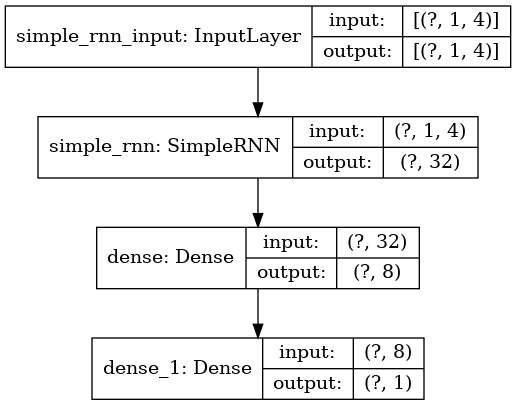

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(keras.layers.Dense(8, activation="relu")) 
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mse'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Train

In [11]:
%%time

print ("training starting ...")

# Fitting the RNN to the Training set
history = model.fit(x_train, y_train, epochs=100, batch_size=16)

print ("training done.")

training starting ...
Train on 800 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/sample - loss: 1.3962 - mse: 1.3962
Epoch 2/100
800/800 [==============================] - 0s 231us/sample - loss: 0.4745 - mse: 0.4745
Epoch 3/100
800/800 [==============================] - 0s 206us/sample - loss: 0.4073 - mse: 0.4073
Epoch 4/100
800/800 [==============================] - 0s 240us/sample - loss: 0.4037 - mse: 0.4037
Epoch 5/100
800/800 [==============================] - 0s 278us/sample - loss: 0.3992 - mse: 0.3992
Epoch 6/100
800/800 [==============================] - 0s 212us/sample - loss: 0.3972 - mse: 0.3972
Epoch 7/100
800/800 [==============================] - 0s 218us/sample - loss: 0.3950 - mse: 0.3950
Epoch 8/100
800/800 [==============================] - 0s 221us/sample - loss: 0.3930 - mse: 0.3930
Epoch 9/100
800/800 [==============================] - 0s 228us/sample - loss: 0.3929 - mse: 0.3929
Epoch 10/100
800/800 [==============================] - 0s 

## Training History

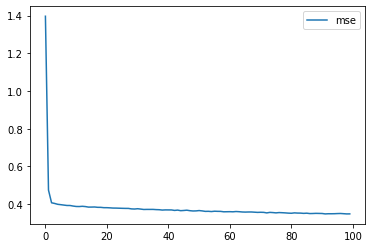

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='mse')
plt.legend()
plt.show()

## Prediction

In [13]:
predict_train = model.predict(x_train)
predict_test= model.predict(x_test)

predicted=np.concatenate((predict_train,predict_test),axis=0)

print (predicted[:10])


[[ 1.1444]
 [ 0.8841]
 [ 0.8980]
 [ 0.9758]
 [ 1.0087]
 [ 0.4280]
 [ 0.9352]
 [ 0.5556]
 [ 0.7442]
 [ 0.6489]]


## Evaluate

In [14]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)

print ("train_score", train_score)
print ("test_score", test_score)

train_score [0.34043187499046323, 0.34043187]
test_score [0.45795602321624757, 0.45795602]


In [15]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

train_metrics = model.evaluate(x_train, y_train, verbose=0)
for idx, metric in enumerate(metric_names):
    print ("Train Metric : {} = {:,.2f}".format (metric_names[idx], train_metrics[idx]))
    
test_metrics = model.evaluate(x_test, y_test, verbose=0)
for idx, metric in enumerate(metric_names):
    print ("Test Metric : {} = {:,.2f}".format (metric_names[idx], test_metrics[idx]))

model metrics :  ['loss', 'mse']
Train Metric : loss = 0.34
Train Metric : mse = 0.34
Test Metric : loss = 0.46
Test Metric : mse = 0.46


## Plot

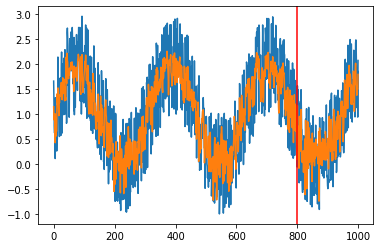

In [16]:
index = df_orig.index.values
plt.plot(index,df_orig)
plt.plot(index,predicted)
plt.axvline(df_orig.index[training_samples], c="r")
plt.show()